In [1]:
# Import packages
import scanpy as sc
import pandas as pd
from functions import data_preprocessing as dp
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Add cell type labels

In [2]:
norm_qc_adata = sc.read_h5ad('../../../../data/processed/data_for_evaluating_cell_type_annotation/Zheng68k.h5ad')

In [3]:
norm_qc_adata

AnnData object with n_obs × n_vars = 68579 × 14066
    obs: 'barcodes', 'cell_type', 'patientID', 'n_counts', 'log_n_counts', 'n_genes', 'log_n_genes', 'pct_counts_in_top_20_genes', 'mt_frac', 'ribo_frac', 'hem_frac', 'size_factors'
    var: 'gene_ENSG', 'n_cells'
    layers: 'log1p_counts'

In [6]:
del norm_qc_adata.layers["log1p_counts"]

## Visualize

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


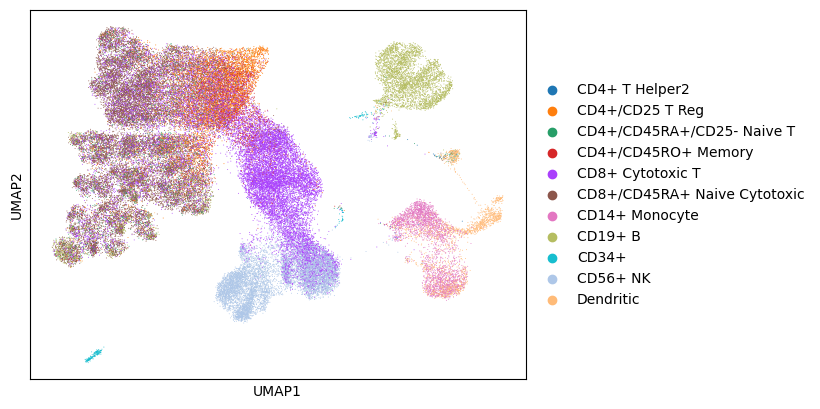

In [7]:
from sklearn.preprocessing import StandardScaler
vis_adata = norm_qc_adata
sc.pp.highly_variable_genes(vis_adata, n_top_genes=4000, flavor="cell_ranger")

sc.pp.pca(vis_adata, n_comps=20, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(vis_adata)
sc.tl.umap(vis_adata)
sc.pl.umap(vis_adata, color='cell_type', title='')

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


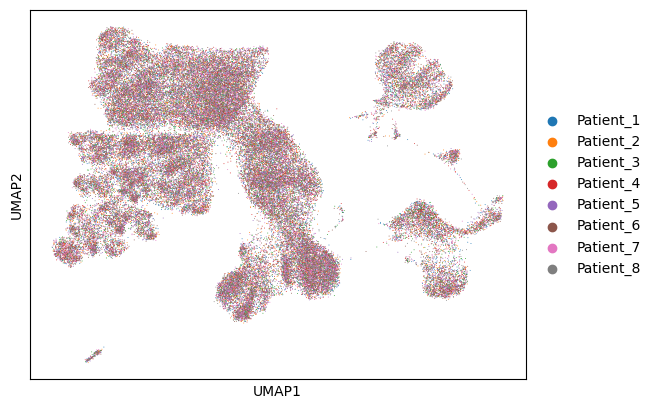

In [8]:
from sklearn.preprocessing import StandardScaler
vis_adata = norm_qc_adata
sc.pp.highly_variable_genes(vis_adata, n_top_genes=4000, flavor="cell_ranger")

sc.pp.pca(vis_adata, n_comps=20, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(vis_adata)
sc.tl.umap(vis_adata)
sc.pl.umap(vis_adata, color='patientID', title='')